**Goals**

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

1-What is the most commonly awarded gender and birth country?

2-Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

3-Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# **Importing the necessary libraries**

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# **Loading the dataset**

In [46]:
df=pd.read_csv('nobel.csv')

# **Data Exploration**

In [47]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,\in recognition of the extraordinary services ...,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""\""in special recognition of his poetic compos...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""\""for his work on serum therapy, especially i...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [48]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [49]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [51]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

We are not going to drop the rows with missing values because:

For motivation, many scientists may have worked without a specified motivation, so it is logical that many rows do not have a motivation value.


For organization name, city, and country, many scientists are independent and may not be associated with any organization.


The death date, city, and country can be null because, at the time the data was collected, the scientist might still have been alive.


The other columns, such as birth date, birth city, birth country, and sex, will not affect our work.

In [52]:
df.duplicated().sum()

0

# **Data Visualization**

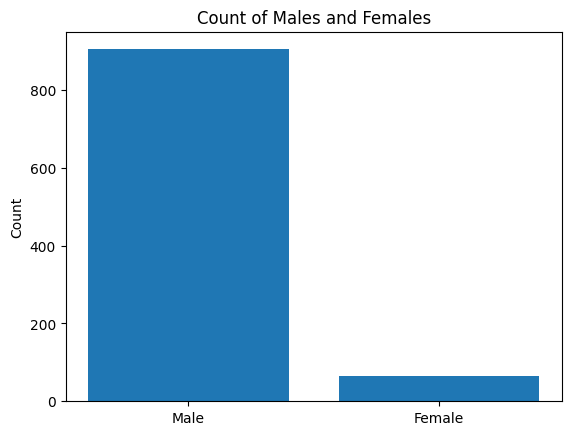

In [53]:
male = df['sex'].value_counts()[0]
female = df['sex'].value_counts()[1]
fig, ax = plt.subplots()
ax.bar(['Male', 'Female'], [male, female])
ax.set_ylabel('Count')
ax.set_title('Count of Males and Females')
plt.show()

In [54]:
top_gender='Male'

In [55]:
# Calculate the proportion of USA born winners per decade
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].mean()
prop_usa_winners.sort_values(by='usa_born_winner',ascending=False)

,decade,usa_born_winner
10,2000,0.422764
9,1990,0.403846
12,2020,0.360000
8,1980,0.319588
7,1970,0.317308
11,2010,0.314050
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
3,1930,0.250000


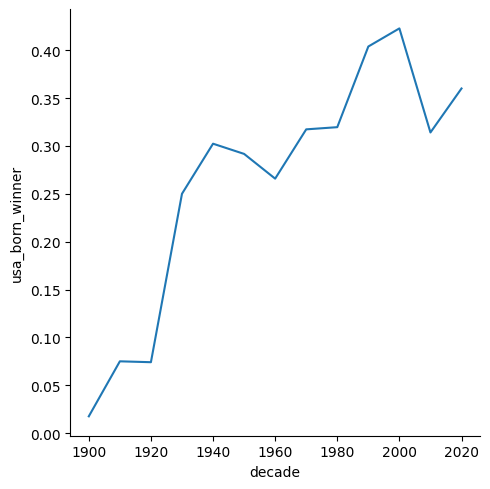

In [56]:
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

In [57]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = 2000


In [58]:
# Calculating the proportion of female laureates per decade
df['female_winner']=df['sex']=='Female'
df['decade']=(df['year'] // 10 ) * 10
female_laurates=df.groupby(['decade','category'],as_index=False)['female_winner'].mean()
female_laurates.sort_values(by='female_winner',ascending=False)

,decade,category,female_winner
68,2020,Literature,0.500000
64,2010,Peace,0.357143
50,1990,Literature,0.300000
56,2000,Literature,0.300000
66,2020,Chemistry,0.300000
...,...,...,...
34,1960,Peace,0.000000
37,1970,Economics,0.000000
38,1970,Literature,0.000000
41,1970,Physics,0.000000


In [59]:
max_female_dict={2020:'Literature'}

In [60]:
# Finding the first woman to win a Nobel Prize
first_woman=df[df['sex']=='Female']
first_woman=first_woman.sort_values(by='year')
first_woman

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,\in recognition of the extraordinary services ...,1/4,6,Individual,"""Marie Curie, née Sklodowska""",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"""Baroness Bertha Sophie Felicita von Suttner, ...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""\""in appreciation of the lofty idealism, vivi...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""\""in recognition of her services to the advan...",1/1,6,Individual,"""Marie Curie, née Sklodowska""",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,\for her idealistically inspired writings whic...,1/1,597,Individual,Grazia Deledda,1871-09-27,"""Nuoro, Sardinia""",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,\for the courage and clinical acuity with whic...,1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True
993,2023,Physics,The Nobel Prize in Physics 2023,\for experimental methods that generate attose...,1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,...,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,False,2020,True
998,2023,Peace,The Nobel Peace Prize 2023,\for her fight against the oppression of women...,1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,\for their discoveries concerning nucleoside b...,1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,...,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,False,2020,True


In [61]:
first_woman_name='Marie Curie, née Sklodowska'
first_woman_category='Physics'

In [62]:
# Selecting the laureates that have received 2 or more prizes
indiv_repeat=df['full_name'].value_counts()
indiv_repeat=indiv_repeat[indiv_repeat>1]
repeat_list=list(indiv_repeat.index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 '"Marie Curie, née Sklodowska"',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']